# Multiple Regression Model

## Part I: Research Question

### A1. Research Question

Can a customer's monthly charge ("MonthlyCharge") be predicted with the variables in the provided dataset?

### A2. Objectives and Goals

The objective of this analysis is to generate a multiple regression model to explain the impact that the variables in the provided dataset have on a subscriber's Monthly Charge. In this scenario, monthly charge is a continuous and dependant variable.  The other provided variables in the dataset will serve as independent variables. The goal is to identify which features the stakeholders can focus on when trying to increase a subscriber's monthly charge.

## Part II: Method Justification

### B1. Summary of Assumptions of a Multiple Regression Model

The four assumptions of a multiple regression model include:

1. There is a linear relationship between the independent variable and the dependent variable.

2. There is an absence of multicollinearity. The residuals are independent, and there is no correlation between consecutive residuals in time series data, there is no autocorrelation.

3. The residuals are homoscedastic, that is they have a constant variance at every level of the independent variables.

4. The residuals of the model are normally distributed.

If one or more of these assumptions is violated, the results of multiple linear regression could be deemed as unreliable or misleading (Reed, 2019; Bobbitt, 2020).

### B2. Tool Benefits

Python will be used for its readability and the availability of packages and libraries for use in data analysis (Larose & Larose, 2019). The libraries and packages chosen include pandas, SciPy, StatsModels, Scikit-Learn, PyLab, Matplotlib, numpy, seaborn, and YellowBrick. Pandas will be used to import data (Vallisneri, 2018). Utilizing the Matplotlib's plot function is good at creating plots to visualize the data (Larose & Larose, 2019). YellowBrick will be utilized to generate residual plots (Scikit-yb developers, 2019).

### B3. Multiple Regression as an Appropriate Technique

When attempting to identify which services to focus on to increase a subscriber's monthly charge, it would be helpful to use multiple regression to generate a model and closely examine the coefficients of each variable. By analyzing the coefficients of the independent variables in the final model, stakeholders could determine which customer variables are most impactful at increasing a subscriber's monthly charge, the dependant variable.  

## Part III: Data Preparation

### C1. Data Preparation Goals and Data Manipulations

The goals of data preparation include identification of data types, detection of missing values, reviewing values of categorical variables, and detection of outliers. Additionally, categorical variables will be checked for spelling errors. Categorical variables will be converted to numeric for ease during the data analysis process.

### C2. Summary Statistics

The churn data contains information on 10,000 customers across various variables.  Unique customer identifiers, customers' geographic location information, customers' jobs, as well as customer survey data were excluded from analysis.

The target variable of MonthlyCharge was included in the analysis along with 26 other features: Children, Age, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, Bandwidth_GB_Year.

Among the continuous variables, Children, Income and Yearly_equip_failure and Contacts had positively skewed distributions. Email and Outage_sec_perweek had normal distributions. Age had a uniform distribution. Tenure and Bandwidth_GB_Year had bimodal distributions.

The income ranged from a minimum of approximately \\$350, to a maximum of approximately \\$260,000, with an average mean income of approximately \\$40,000.  The number of children per customer ranged from 0 to 10, with the average being 2.  

The customer ages ranged from 18 to 89, with an average age of around 53 years of age.
The tenure, or number of months the customer has been with the provider ranged from 1 month to 72 months, with a mean tenure of approximately 35 months.

The monthly charge ranged from approximately \\$80 to \\$290 per month. The average monthly charge was approximately \\$172 per month. While most customers had phone service, the use of streaming tv and movies was split amongst the customers, with half using the features, and the other half not using them.

*Please see code below in sections C3 and C4.*

### C3. Data Preparation Steps

After importing the necessary packages and libraries, the raw dataset will be imported.

The .info function will be used to view the column names and datatypes.

The total missing values in each column will be calculated using the isnull().sum() function. If necessary, imputation will be performed to replace the missing values with the appropriate mean, median or mode using the .fillna function.

Univariate and bivariate visualizations will be generated to examine the distributions of the variables. Histograms will be created of the continuous variables to view the distributions. To detect outliers, boxplots will be utilized. If necessary to treat outliers, additional analysis will be conducted to determine if the outliers should be removed, retained, excluded or replaced.

Categorical variables will be assessed for unique values, and will later be  encoded for ease during data analysis.

Lastly, the prepared dataset will be extracted.

In [102]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab
from pylab import rcParams
import statsmodels.api as sm  
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV

import yellowbrick.datasets
import yellowbrick.regressor
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

import warnings
warnings.filterwarnings('ignore')

print("Done.")

Done.


In [2]:
churn_df=pd.read_csv('Desktop/WGU/D208/churn_clean.csv')
print("Imported.")

Imported.


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
pd.set_option('display.max_columns', 60)
print("Display size adjusted.")

Display size adjusted.


In [4]:
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

**Assessing for missing values**

In [6]:
churn_df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

No nulls present.

**Viewing summary statistics**

In [7]:
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


**Removing less meaningful information**

In [8]:
churn_df=churn_df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'])

In [9]:
churn_df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


Reviewing the categorical columns remaining

In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Churn                 10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  object 
 11  Contract              10000 non-null  object 
 12  Port_modem            10000 non-null  object 
 13  Tablet                10000 non-null  object 
 14  InternetService       10000 non-null  object 
 15  Phone               

Checking the categorical columns for unique values and value counts, using the value counts function

In [11]:
churn_df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [12]:
churn_df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [13]:
churn_df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [14]:
churn_df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [15]:
churn_df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [16]:
churn_df.Port_modem.value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [17]:
churn_df.Tablet.value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [18]:
churn_df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [19]:
churn_df.Phone.value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [20]:
churn_df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [21]:
churn_df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [22]:
churn_df.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [23]:
churn_df.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [24]:
churn_df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [25]:
churn_df.StreamingTV.value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [26]:
churn_df.StreamingMovies.value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [27]:
churn_df.PaperlessBilling.value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [28]:
churn_df.PaymentMethod.value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

### C4. Visualizations of Distributions of Variables

#### Univariate Statistics

In [29]:
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


Viewing histograms of continuous variables

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Email'}>,
        <AxesSubplot:title={'center':'Contacts'}>],
       [<AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

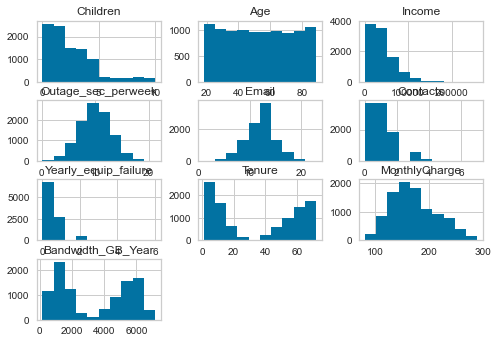

In [30]:
churn_df[['Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']].hist()

Viewing boxplots of continuous variables

<AxesSubplot:xlabel='Children'>

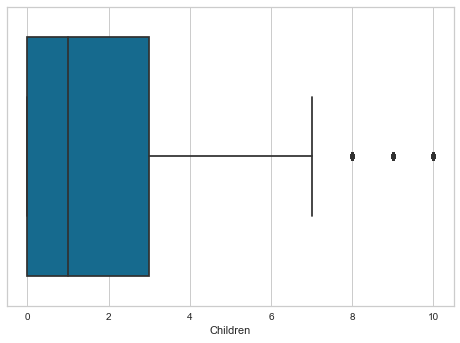

In [31]:
sns.boxplot(x='Children',data=churn_df)

<AxesSubplot:xlabel='Age'>

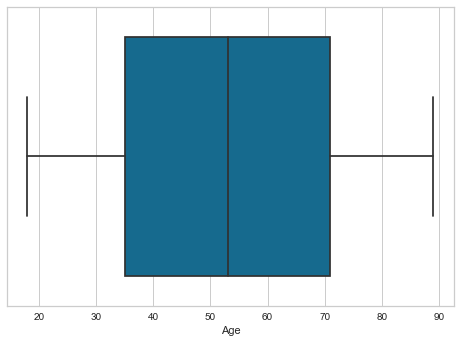

In [32]:
sns.boxplot(x='Age',data=churn_df)

<AxesSubplot:xlabel='Income'>

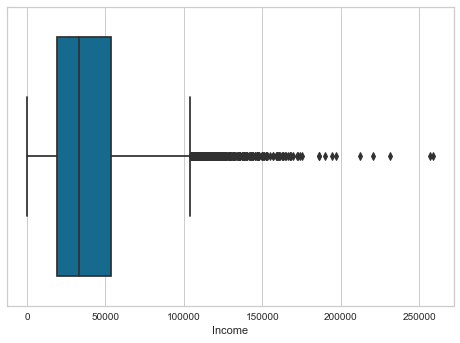

In [33]:
sns.boxplot(x='Income',data=churn_df)

<AxesSubplot:xlabel='Outage_sec_perweek'>

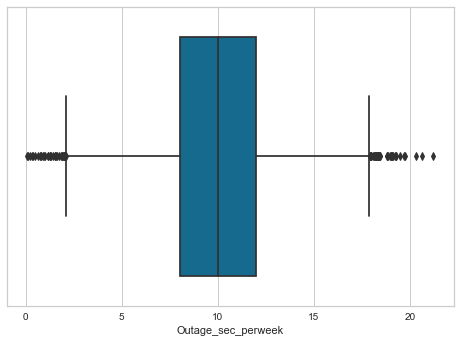

In [34]:
sns.boxplot(x='Outage_sec_perweek',data=churn_df)

<AxesSubplot:xlabel='Email'>

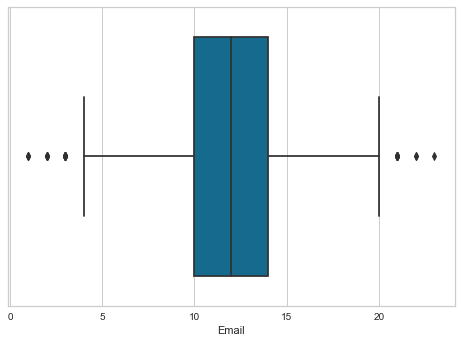

In [35]:
sns.boxplot(x='Email',data=churn_df)

<AxesSubplot:xlabel='Contacts'>

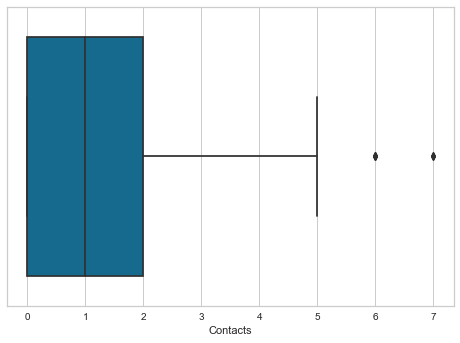

In [36]:
sns.boxplot(x='Contacts',data=churn_df)

<AxesSubplot:xlabel='Yearly_equip_failure'>

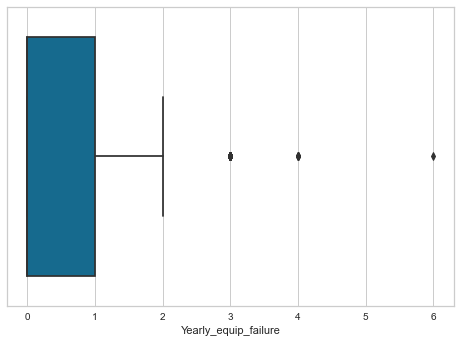

In [37]:
sns.boxplot(x='Yearly_equip_failure',data=churn_df)

<AxesSubplot:xlabel='Tenure'>

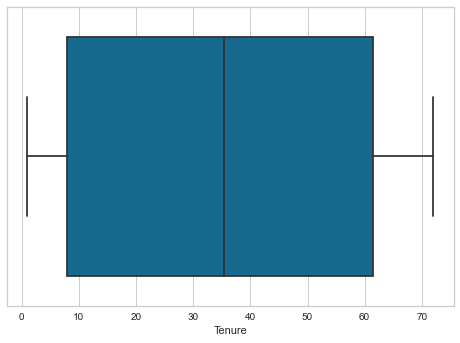

In [38]:
sns.boxplot(x='Tenure',data=churn_df)

<AxesSubplot:xlabel='MonthlyCharge'>

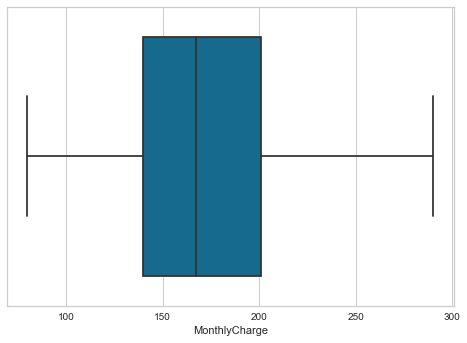

In [39]:
sns.boxplot(x='MonthlyCharge',data=churn_df)

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

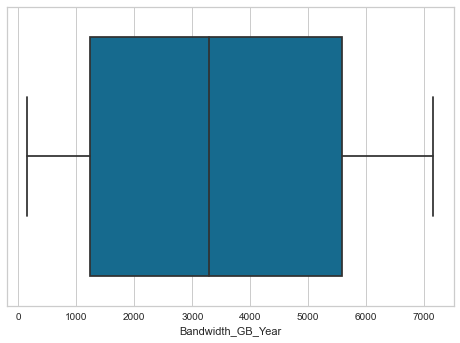

In [40]:
sns.boxplot(x='Bandwidth_GB_Year',data=churn_df)

Viewing bar charts of descriptive variables

<AxesSubplot:xlabel='Marital'>

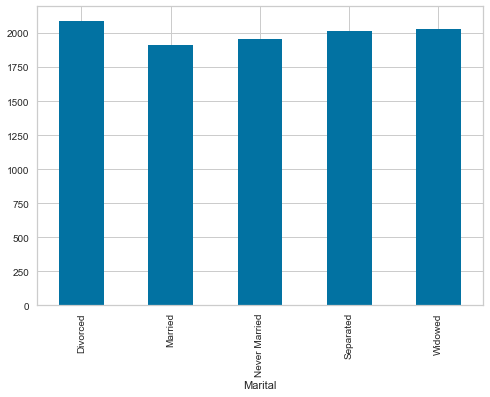

In [41]:
churn_df.groupby('Marital').size().plot.bar()

<AxesSubplot:xlabel='Gender'>

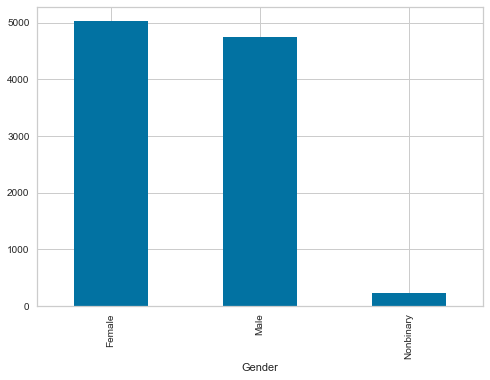

In [42]:
churn_df.groupby('Gender').size().plot.bar()

<AxesSubplot:xlabel='Churn'>

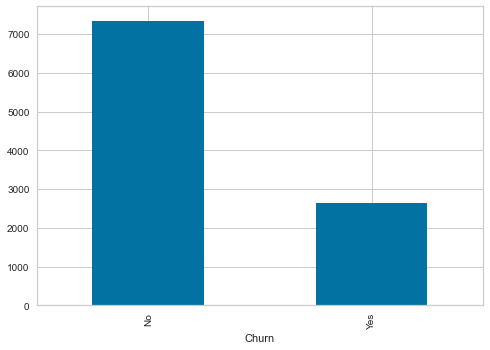

In [43]:
churn_df.groupby('Churn').size().plot.bar()

<AxesSubplot:xlabel='Techie'>

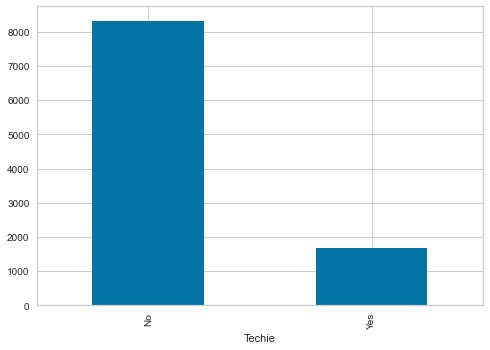

In [44]:
    churn_df.groupby('Techie').size().plot.bar()

<AxesSubplot:xlabel='Contract'>

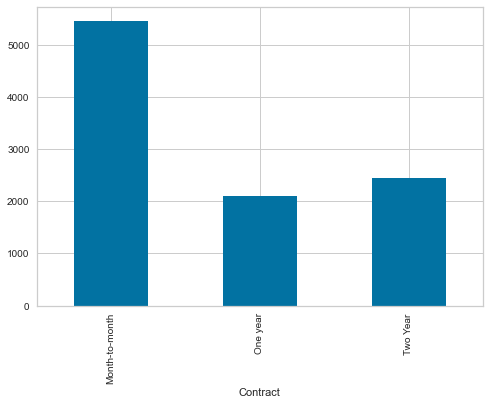

In [45]:
churn_df.groupby('Contract').size().plot.bar()

<AxesSubplot:xlabel='Port_modem'>

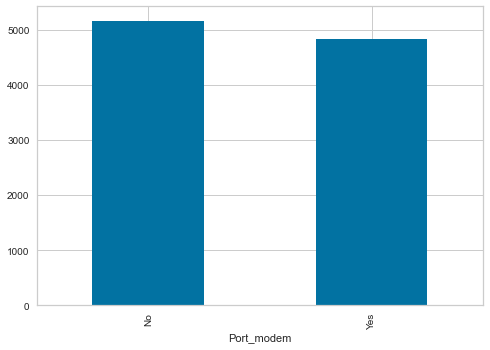

In [46]:
churn_df.groupby('Port_modem').size().plot.bar()

<AxesSubplot:xlabel='Tablet'>

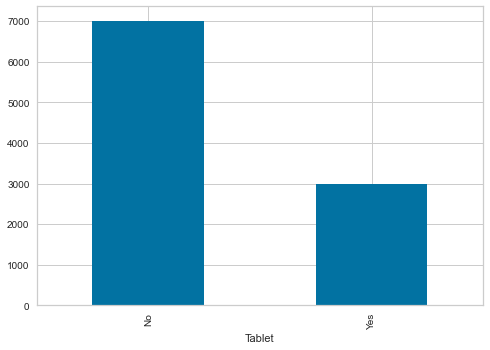

In [47]:
churn_df.groupby('Tablet').size().plot.bar()

<AxesSubplot:xlabel='InternetService'>

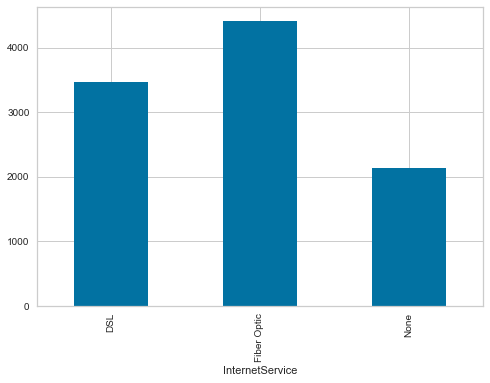

In [48]:
churn_df.groupby('InternetService').size().plot.bar()

<AxesSubplot:xlabel='Phone'>

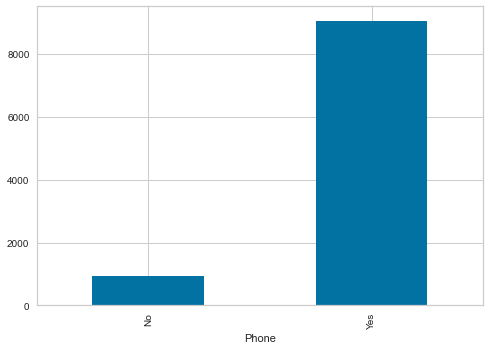

In [49]:
churn_df.groupby('Phone').size().plot.bar()

<AxesSubplot:xlabel='Multiple'>

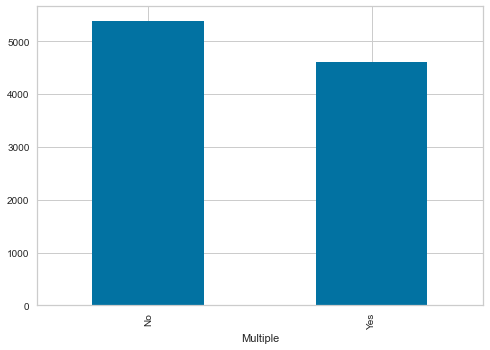

In [50]:
churn_df.groupby('Multiple').size().plot.bar()

<AxesSubplot:xlabel='OnlineSecurity'>

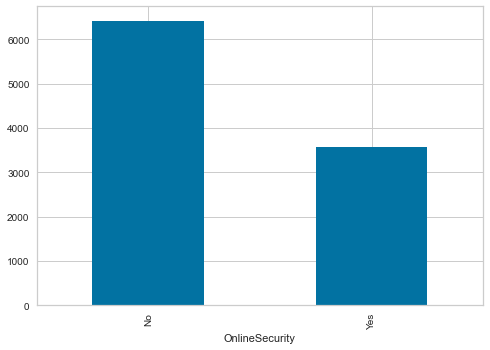

In [51]:
churn_df.groupby('OnlineSecurity').size().plot.bar()

<AxesSubplot:xlabel='OnlineBackup'>

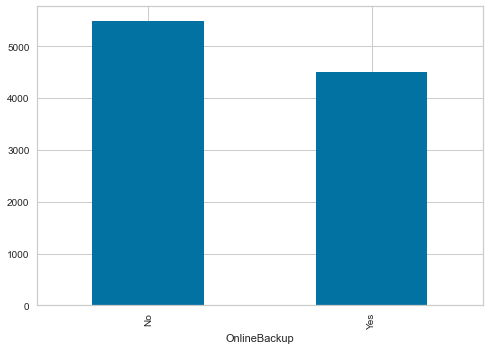

In [52]:
churn_df.groupby('OnlineBackup').size().plot.bar()

<AxesSubplot:xlabel='DeviceProtection'>

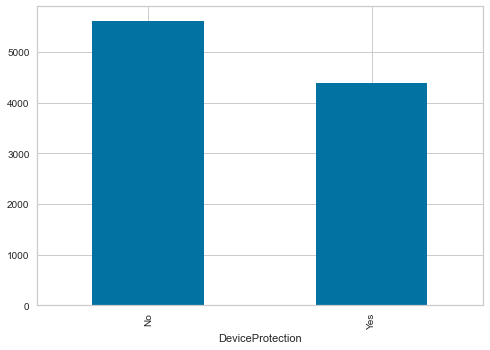

In [53]:
churn_df.groupby('DeviceProtection').size().plot.bar()

<AxesSubplot:xlabel='TechSupport'>

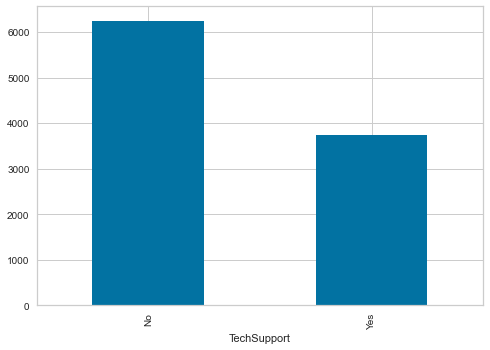

In [54]:
churn_df.groupby('TechSupport').size().plot.bar()

<AxesSubplot:xlabel='StreamingTV'>

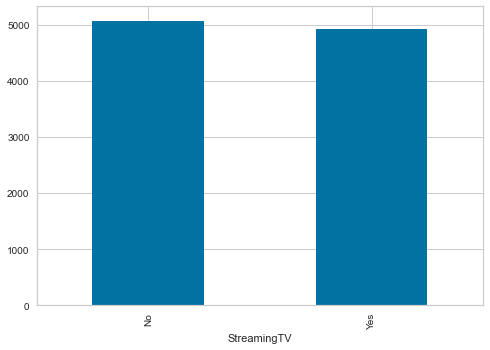

In [55]:
churn_df.groupby('StreamingTV').size().plot.bar()

<AxesSubplot:xlabel='StreamingMovies'>

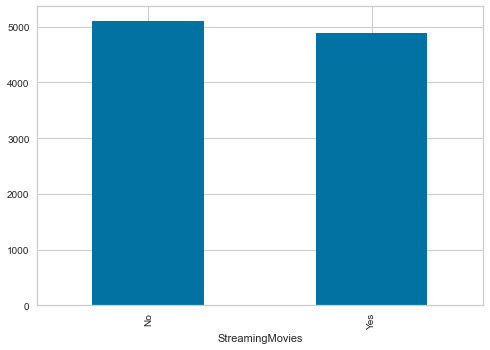

In [56]:
churn_df.groupby('StreamingMovies').size().plot.bar()

<AxesSubplot:xlabel='PaperlessBilling'>

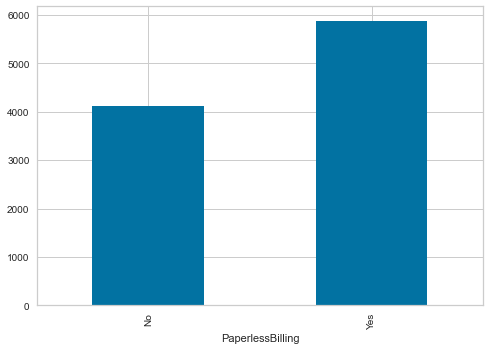

In [57]:
churn_df.groupby('PaperlessBilling').size().plot.bar()

<AxesSubplot:xlabel='PaymentMethod'>

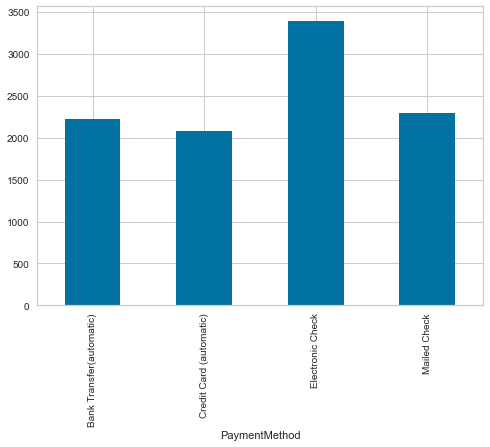

In [58]:
churn_df.groupby('PaymentMethod').size().plot.bar()

Creating dummy variables for Yes/No categorical variables before visualizing bivariate statistics

In [59]:
churn_df.dtypes

Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [60]:
x1=['Marital','Gender','Contract','InternetService','PaymentMethod','Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
churn_df=pd.get_dummies(churn_df, prefix=x1, prefix_sep='_', dummy_na=False, columns=x1, drop_first=True)

Viewing column names after encoding

In [61]:
churn_df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary',
       'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
       'InternetService_None', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes'],
      dtype='object')

Confirming all datatypes are numeric

In [62]:
churn_df.dtypes

Children                                   int64
Age                                        int64
Income                                   float64
Outage_sec_perweek                       float64
Email                                      int64
Contacts                                   int64
Yearly_equip_failure                       int64
Tenure                                   float64
MonthlyCharge                            float64
Bandwidth_GB_Year                        float64
Marital_Married                            uint8
Marital_Never Married                      uint8
Marital_Separated                          uint8
Marital_Widowed                            uint8
Gender_Male                                uint8
Gender_Nonbinary                           uint8
Contract_One year                          uint8
Contract_Two Year                          uint8
InternetService_Fiber Optic                uint8
InternetService_None                       uint8
PaymentMethod_Credit

Previewing dataframe after encoding

In [63]:
churn_df.head(5)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0


#### Bivariate Statistics

Visualizing Bivariate Statistics

<AxesSubplot:xlabel='Age', ylabel='MonthlyCharge'>

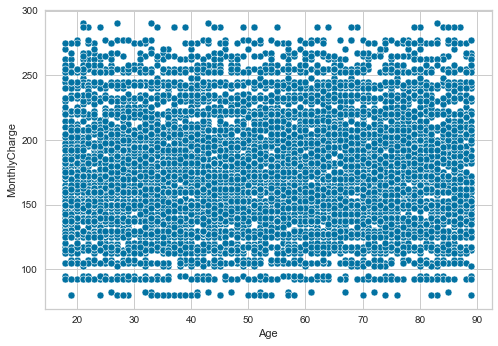

In [64]:
sns.scatterplot(x=churn_df['Age'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Income', ylabel='MonthlyCharge'>

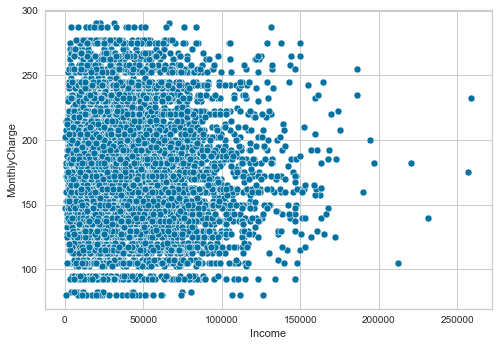

In [65]:
sns.scatterplot(x=churn_df['Income'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharge'>

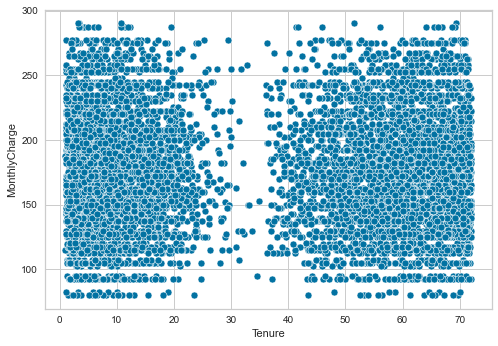

In [66]:
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='PaymentMethod_Credit Card (automatic)', ylabel='MonthlyCharge'>

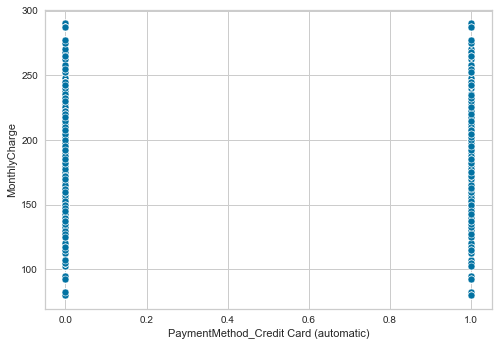

In [67]:
sns.scatterplot(x=churn_df['PaymentMethod_Credit Card (automatic)'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='PaymentMethod_Electronic Check', ylabel='MonthlyCharge'>

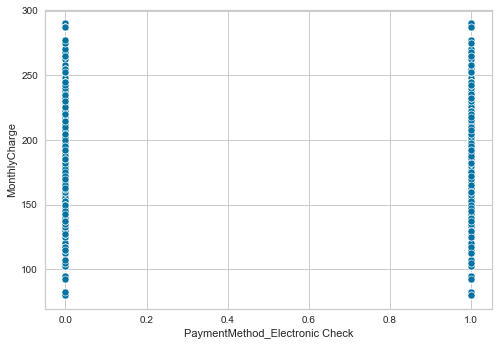

In [68]:
sns.scatterplot(x=churn_df['PaymentMethod_Electronic Check'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='PaymentMethod_Mailed Check', ylabel='MonthlyCharge'>

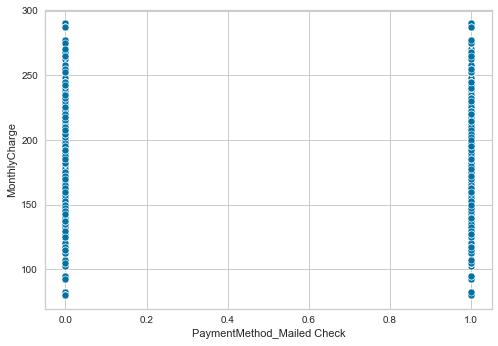

In [69]:
sns.scatterplot(x=churn_df['PaymentMethod_Mailed Check'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Children', ylabel='MonthlyCharge'>

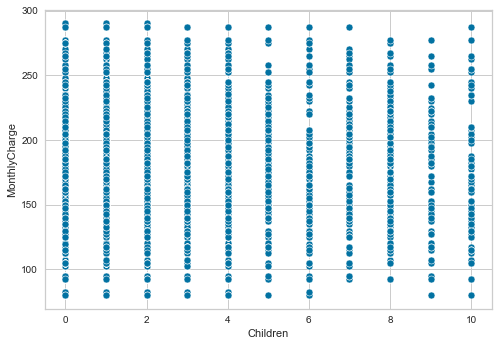

In [70]:
sns.scatterplot(x=churn_df['Children'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Marital_Married', ylabel='MonthlyCharge'>

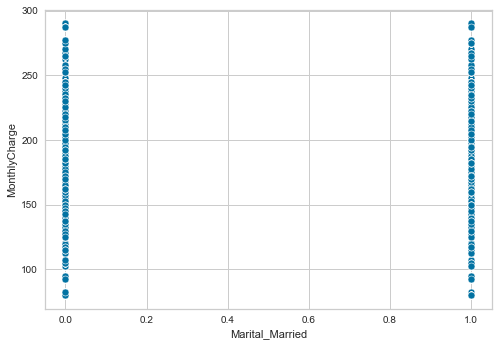

In [71]:
sns.scatterplot(x=churn_df['Marital_Married'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Marital_Never Married', ylabel='MonthlyCharge'>

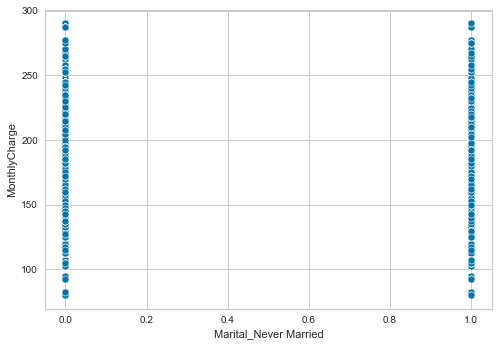

In [72]:
sns.scatterplot(x=churn_df['Marital_Never Married'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Marital_Separated', ylabel='MonthlyCharge'>

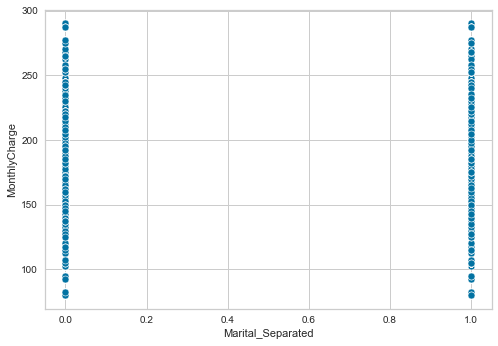

In [73]:
sns.scatterplot(x=churn_df['Marital_Separated'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Marital_Widowed', ylabel='MonthlyCharge'>

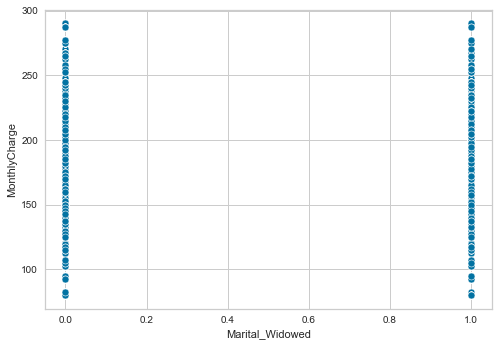

In [74]:
sns.scatterplot(x=churn_df['Marital_Widowed'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Contract_One year', ylabel='MonthlyCharge'>

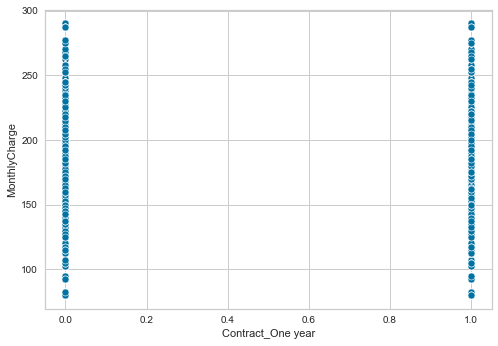

In [75]:
sns.scatterplot(x=churn_df['Contract_One year'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='InternetService_Fiber Optic', ylabel='MonthlyCharge'>

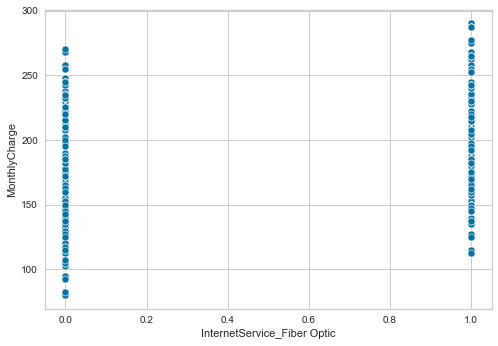

In [76]:
sns.scatterplot(x=churn_df['InternetService_Fiber Optic'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='StreamingMovies_Yes', ylabel='MonthlyCharge'>

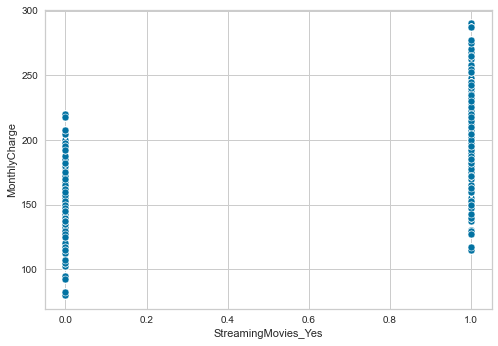

In [77]:
sns.scatterplot(x=churn_df['StreamingMovies_Yes'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='StreamingTV_Yes', ylabel='MonthlyCharge'>

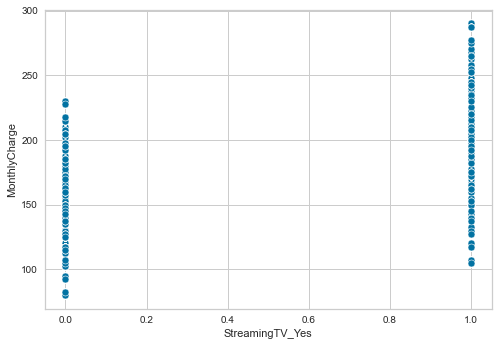

In [78]:
sns.scatterplot(x=churn_df['StreamingTV_Yes'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='PaperlessBilling_Yes', ylabel='MonthlyCharge'>

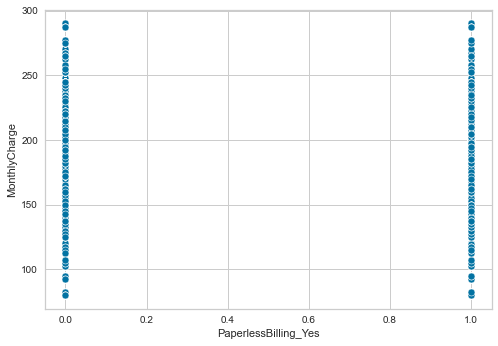

In [79]:
sns.scatterplot(x=churn_df['PaperlessBilling_Yes'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='MonthlyCharge'>

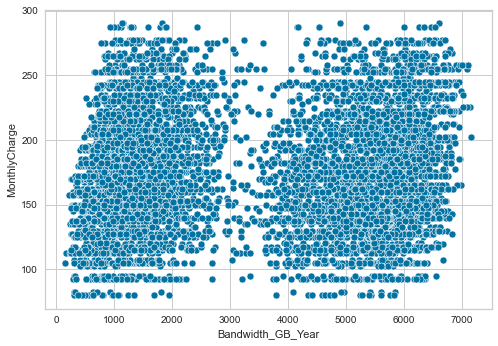

In [80]:
sns.scatterplot(x=churn_df['Bandwidth_GB_Year'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Phone_Yes', ylabel='MonthlyCharge'>

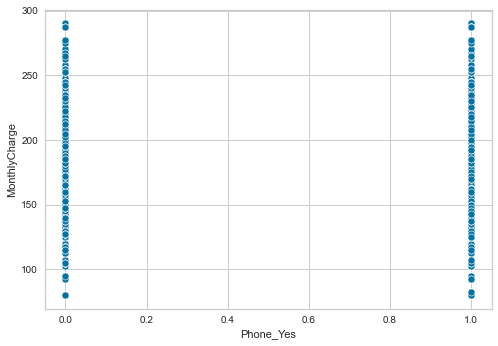

In [81]:
sns.scatterplot(x=churn_df['Phone_Yes'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='TechSupport_Yes', ylabel='MonthlyCharge'>

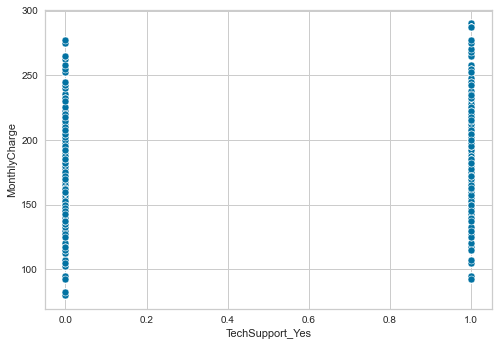

In [82]:
sns.scatterplot(x=churn_df['TechSupport_Yes'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Techie_Yes', ylabel='MonthlyCharge'>

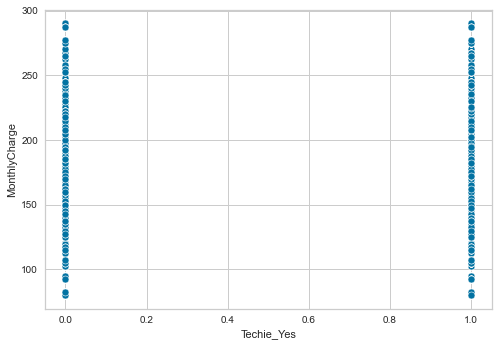

In [83]:
sns.scatterplot(x=churn_df['Techie_Yes'], y=churn_df['MonthlyCharge'])

<AxesSubplot:xlabel='Yearly_equip_failure', ylabel='MonthlyCharge'>

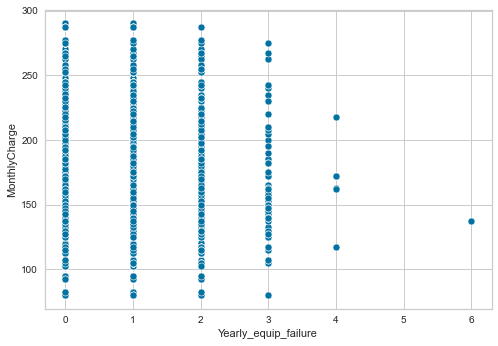

In [84]:
sns.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['MonthlyCharge'])

### C5. Copy of Prepared Data Set

In [85]:
churn_df.to_csv('churn_prepared_multiple_regression.csv')

In [86]:
churn_df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary',
       'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
       'InternetService_None', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes'],
      dtype='object')

In [87]:
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,0.191100,0.195600,0.201400,0.202700,0.474400,0.023100,0.210200,0.244200,0.440800,0.212900,0.208300,0.339800,0.22900,0.265000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,0.393187,0.396682,0.401066,0.402031,0.499369,0.150229,0.407471,0.429633,0.496508,0.409378,0.406113,0.473665,0.42021,0.441355,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
churn_df.shape

(10000, 36)

## Part IV: Model Comparison and Analysis

### D1. Initial Multiple Regression Model

Generating an initial multiple regression model (Reed, 2019).

In [89]:
X=churn_df.drop('MonthlyCharge', axis=1)
Y=churn_df[['MonthlyCharge']]
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.20, random_state=1)
regression_model=LinearRegression()
regression_model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [90]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))

for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -88.15
The Coefficient for Children is -9.5
The Coefficient for Age is 1.0
The Coefficient for Income is 2.8e-08
The Coefficient for Outage_sec_perweek is 0.0043
The Coefficient for Email is -0.002
The Coefficient for Contacts is -0.0078
The Coefficient for Yearly_equip_failure is -0.018
The Coefficient for Tenure is -2.5e+01
The Coefficient for Bandwidth_GB_Year is 0.31
The Coefficient for Marital_Married is -0.034
The Coefficient for Marital_Never Married is -0.13
The Coefficient for Marital_Separated is 0.018
The Coefficient for Marital_Widowed is -0.091
The Coefficient for Gender_Male is -2e+01
The Coefficient for Gender_Nonbinary is 6.5
The Coefficient for Contract_One year is 0.16
The Coefficient for Contract_Two Year is 0.19
The Coefficient for InternetService_Fiber Optic is 1.5e+02
The Coefficient for InternetService_None is 1.2e+02
The Coefficient for PaymentMethod_Credit Card (automatic) is -0.023
The Coefficient for PaymentMethod_Electronic Che

**The initial model, with y being MonthlyCharge, and including both categorical and continuous variables:**

y=-88.15 -9.5(Children) + Age + 0.000000028(Income) + 0.0043(Outage_sec_perweek) -0.005(Email) -0.0078(Contracts) -0.018(Yearly_equip_failure) - 25(Tenure) + 0.31(Bandwidth_GB_Year) -0.031 (Marital_Married) -.013(Marital_Never Married) + 0.018 (Marital_Separated) -0.091(Marital_Widowed) -20(Gender_Male) + 6.5(Gender_Nonbinary) + 0.16(Contract_One year) + 0.19(Contract_Two Year) + 150(InternetService_Fiber Optic) + 120(InternetService_None) - 0.023(PaymentMethod_Credit Card (automatic)) + 0.046(PaymentMethod_Electronic Check) + 0.16(PaymentMethod_Mailed Check) + 0.47(Churn_Yes) + 0.019(Techie_Yes) + 0.055(Port_modem_Yes) + 0.019(Tablet_Yes) + 0.054(Phone_Yes) + 10(Multiple_Yes) -21 (OnlineSecurity_Yes) -6.5(OnlineBackup_Yes) -14 (DeviceProtection_Yes) + 11(TechSupport_Yes) -28 (StreamingTV_Yes) -13 (StreamingMovies_Yes) - 0.0159(PaperlessBilling_Yes)


In [91]:
Initial_reg_model=regression_model.fit(X_train, y_train)
print("Accuracy:", Initial_reg_model.score(X_test, y_test))
print("Mean Squared Error (MSE): %.2f"% np.mean((Initial_reg_model.predict(X_test)-y_test) **2))
print("Variance score: %.2f" % Initial_reg_model.score(X_test,y_test))

Accuracy: 0.9954535726645373
Mean Squared Error (MSE): 8.39
Variance score: 1.00


Results yielded a 99.55% prediction rate for monthly charge, MSE was 8.39 and Variance was 1.00. However, with 35 variables, we need to conduct further analysis to assess and reduce the model. 

### D2. Variable Selection Procedure and Model Evaluation Metric to Reduce Initial Model

Correlation matrices, heatmaps, variance inflation factor (VIF) and p-values will be generated and calculated to examine the variables and select the variables which will be eligible for elimination in the new reduced model.

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
Children,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.005260,-0.002647,0.000508,-0.000321,0.005125,0.002400,0.011277,0.017653,-0.003150,0.007314,0.005771,0.003441,-0.003750,-0.004264,-0.006884,0.011283,0.001494,-0.001629,-0.021969,0.006937,-0.000297,0.005477,0.000878,-0.007106,0.003461,0.006828
Age,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.005491,0.005879,-0.006444,-0.005371,0.005332,-0.019108,-0.005215,-0.007326,0.001240,0.003766,-0.000372,0.000588,-0.020795,0.005630,-0.007531,0.006081,-0.004384,0.009521,-0.004674,-0.011213,0.003309,0.014489,0.017155,-0.000197,0.010125,0.002247
Income,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,0.009022,0.003758,-0.010934,-0.000360,-0.023870,0.006300,0.002225,-0.003964,-0.016990,-0.001261,-0.005798,0.003597,0.014535,0.005937,0.005442,-0.014977,0.005999,-0.001677,-0.000214,-0.010385,-0.005974,0.014073,0.008835,-0.003324,-0.002186,-0.012049
Outage_sec_perweek,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,0.016806,-0.020134,0.007104,-0.013863,0.010859,-0.001960,-0.005584,0.015318,0.004552,0.007797,0.011445,0.004995,-0.009557,-0.000156,-0.006264,0.006326,0.005614,-0.010267,0.012142,-0.002416,0.000457,0.022008,-0.013221,0.008952,0.018086,-0.011208
Email,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,0.009450,0.000475,0.002783,-0.002995,0.013707,-0.008513,-0.013516,0.004072,0.002827,-0.001216,0.017390,-0.009167,0.001759,0.012326,-0.014047,0.014196,-0.008579,-0.007281,-0.002966,-0.024908,-0.011763,0.001520,0.022119,0.005099,0.000711,-0.012632
Contacts,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,0.001051,0.006464,-0.012442,0.004217,0.001725,0.000902,-0.002684,0.007810,0.003987,-0.016473,0.003508,-0.004548,-0.019917,0.008567,0.005343,-0.002219,-0.011855,0.005422,-0.016090,0.010922,0.010398,0.000497,-0.013009,0.000524,0.011002,-0.002649
Yearly_equip_failure,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,-0.002231,0.004167,-0.017477,0.012617,0.000909,0.025188,0.011734,-0.007290,-0.004556,-0.001668,0.007344,0.016798,-0.016624,-0.015927,-0.008516,0.005686,0.003634,-0.007929,0.002213,-0.016486,-0.011500,-0.005903,0.003735,0.002597,-0.004473,0.016603
Tenure,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,0.005189,0.002887,0.001125,-0.000656,-0.010922,-0.010902,-0.006127,0.019495,-0.003820,-0.010098,0.011513,-0.002885,0.006218,-0.485475,-0.010041,0.008764,0.000544,0.003256,-0.010422,0.002508,0.020802,-0.028114,-0.001377,0.002440,-0.002574,-0.000655
MonthlyCharge,-0.009781,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406,-0.006402,0.001334,0.011717,-0.009871,0.008869,0.001817,0.012599,0.002262,0.286602,-0.237883,0.011922,-0.010610,-0.002798,0.372938,0.007185,0.000156,0.007280,-0.018977,0.385979,0.047734,0.259440,0.162735,0.120301,0.482312,0.608115,0.001348
Bandwidth_GB_Year,0.025585,-0.014724,0.003674,0.004176,-0.014579,0.003299,0.012034,0.991495,0.060406,1.000000,0.005146,0.001941,0.001663,-0.002128,0.006724,-0.013834,-0.003969,0.020566,-0.061956,-0.044727,0.010838,-0.002818,0.006610,-0.441669,-0.009455,0.00

<AxesSubplot:>

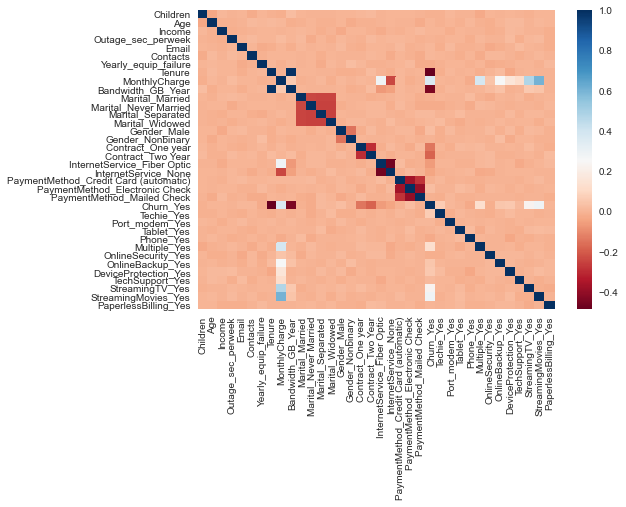

In [92]:
corr=churn_df.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

Interestingly, Bandwith_GB_Year is highly correlated with Tenure, the correlation is .99. This was an unexpected correlation.

**Calculating Variance Inflation Factor**

To determine the extent to which a certain variable is contributing towards the standard error within the initial regression model, the variance inflation factor (VIF) will be calculated for each variable. As is generally recommended, any of the variables that have a VIF of 5 or greater, will be eligible for removal in the reduced regression model (Reed, 2019).

In [93]:
churn_df_before=churn_df
X1=sm.tools.add_constant(churn_df_before)
series_before=pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])],index=X1.columns)
print('DATA WITH ALL RELEVANT VARIABLES:')
display(series_before)

DATA WITH ALL RELEVANT VARIABLES:


const                                     1448.195836
Children                                    57.490357
Age                                         60.511245
Income                                       1.002882
Outage_sec_perweek                           1.003636
Email                                        1.003546
Contacts                                     1.003401
Yearly_equip_failure                         1.003588
Tenure                                   60749.408775
MonthlyCharge                              223.017417
Bandwidth_GB_Year                        61804.189458
Marital_Married                              1.551208
Marital_Never Married                        1.561271
Marital_Separated                            1.571271
Marital_Widowed                              1.575534
Gender_Male                                 14.629880
Gender_Nonbinary                             1.159532
Contract_One year                            1.190356
Contract_Two Year           

Viewing the above VIFs, the following variables will be considered for elimination in the reduced model: Children, Age, Tenure, Bandwidth_GB_Year, Gender_Male, Gender_Nonbinary, InternetService_Fiber Optic, InternetService_None, Multiple_Yes, OnlineSecurity_Yes, OnlineBackup_Yes, and DeviceProtection_Yes. Additionally, Marital Status, Contract Term and Payment Method variables will be removed for deeper analysis.

In [94]:
churn_df_after=churn_df.drop(['Children', 'Age', 'Tenure', 'Bandwidth_GB_Year', 'Gender_Male','Gender_Nonbinary','Marital_Married','Marital_Never Married','Marital_Separated','Marital_Widowed','Contract_One year','Contract_Two Year','PaymentMethod_Credit Card (automatic)','PaymentMethod_Electronic Check'
,'PaymentMethod_Mailed Check'], axis=1)
X2=sm.tools.add_constant(churn_df_after)
series_after=pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
print("DATA AFTER:")
display(series_after)

DATA AFTER:


const                          145.572214
Income                           1.001632
Outage_sec_perweek               1.002139
Email                            1.002563
Contacts                         1.001652
Yearly_equip_failure             1.001679
MonthlyCharge                   24.134627
InternetService_Fiber Optic      2.577954
InternetService_None             1.633532
Churn_Yes                        1.224282
Techie_Yes                       1.006981
Port_modem_Yes                   1.001104
Tablet_Yes                       1.003068
Phone_Yes                        1.002978
Multiple_Yes                     4.424554
OnlineSecurity_Yes               1.024900
OnlineBackup_Yes                 2.638155
DeviceProtection_Yes             1.502022
TechSupport_Yes                  1.483055
StreamingTV_Yes                  6.765300
StreamingMovies_Yes              9.867322
PaperlessBilling_Yes             1.002379
dtype: float64

**Reviewing OLS Regression Results and P-Values to further reduce the model** (Reed, 2019)

In [95]:
X2 = sm.add_constant(X)
reduced_model = sm.OLS(Y, X2)
RModel = reduced_model.fit()
print(RModel.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.321e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:32:58   Log-Likelihood:                -24751.
No. Observations:               10000   AIC:                         4.957e+04
Df Residuals:                    9964   BIC:                         4.983e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

After reviewing the P-values above, the variables with p-values greater than 0.05 will be removed. These variables include: Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie_Yes, Port_modem_Yes, Tablet_Yes, Phone_Yes, and PaperlessBilling_Yes.

### D3. Reduced Multiple Regression Model

In [96]:
churn_df_final=churn_df.drop(['Children', 'Age', 'Tenure', 'Bandwidth_GB_Year', 'Gender_Male','Gender_Nonbinary','Marital_Married','Marital_Never Married','Marital_Separated','Marital_Widowed','Contract_One year','Contract_Two Year','PaymentMethod_Credit Card (automatic)','PaymentMethod_Electronic Check'
,'PaymentMethod_Mailed Check','Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie_Yes', 'Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes','PaperlessBilling_Yes'], axis=1)


In [97]:
X=churn_df_final.drop('MonthlyCharge', axis=1)
Y=churn_df_final[['MonthlyCharge']]
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.20, random_state=1)
final_model=LinearRegression()
final_model.fit(X_train, y_train)

LinearRegression()

In [98]:
X2 = sm.add_constant(X)
final_reg_model = sm.OLS(Y, X2)
FModel = final_reg_model.fit()
print(FModel.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.309e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:34:17   Log-Likelihood:                -35874.
No. Observations:               10000   AIC:                         7.177e+04
Df Residuals:                    9989   BIC:                         7.185e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [99]:
intercept = final_model.intercept_[0]
coefficient = final_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for coef in zip(X.columns, final_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 84.04
----------------------------------------------------------------------------------------------------
The Coefficient for InternetService_Fiber Optic is 2e+01
The Coefficient for InternetService_None is -1.3e+01
The Coefficient for Churn_Yes is 2.2
The Coefficient for Multiple_Yes is 3.2e+01
The Coefficient for OnlineSecurity_Yes is 2.7
The Coefficient for OnlineBackup_Yes is 2.2e+01
The Coefficient for DeviceProtection_Yes is 1.2e+01
The Coefficient for TechSupport_Yes is 1.2e+01
The Coefficient for StreamingTV_Yes is 4.2e+01
The Coefficient for StreamingMovies_Yes is 5.2e+01


**Reduced Multiple Regression Model**

y=84.04 +20(InternetService_Fiber Optic) -13(InternetService_None) +2.2(Churn_Yes) + 32(Multiple_Yes) + 2.7(OnlineSecurity_Yes) + 22(OnlineBackup_Yes) + 12(DeviceProtection_Yes) + 12(TechSupport_Yes) + 42(StreamingTV_Yes) + 52(StreamingMovies_Yes)

In [100]:
import math
y_predict = final_model.predict(X_test)
model_mse=mean_squared_error(y_test, y_predict)
model_mae=mean_absolute_error(y_test, y_predict)
model_rmse = math.sqrt(model_mse)
r_squared=r2_score(y_test, y_predict)

print("R Squared: {:.4}".format(r_squared))
print("Mean Squared Error: {:.4}".format(model_mse))
print("Mean Absolute Error: {:.4}".format(model_mae))
print("Root Mean Square Error (RMSE): {:.4}".format(model_rmse))
print("Variance score: %.2f" % final_model.score(X_test,y_test))

R Squared: 0.9584
Mean Squared Error: 76.74
Mean Absolute Error: 8.706
Root Mean Square Error (RMSE): 8.76
Variance score: 0.96


### E1. Comparison of Initial and Reduced Multiple Regression Models

The initial multiple regression model with 35 variables generated the following scores: 

<br>
Accuracy: 0.9954535726645373 <br>
Mean Squared Error (MSE): 8.39 <br>
Variance score: 1.00 <br>
<br>
The reduced multiple regression model with 10 variables generated the following scores:<br>
<br>
R Squared: 0.9584<br>
Mean Squared Error: 76.74<br>
Mean Absolute Error: 8.706<br>
Root Mean Square Error (RMSE): 8.76<br>
Variance score: 0.96<br>
<br>
By utilizing VIF, p-values, heatmaps and correlation matrices, the number of variables was able to be greatly reduced from 35 to 10. The final reduced multiple regression model yielded an R squared of 0.9584. Thus, 96% of the variation is explained by this newly reduced multiple regression model.  

**Residual Plot** (Scikit-yb developers, 2019)

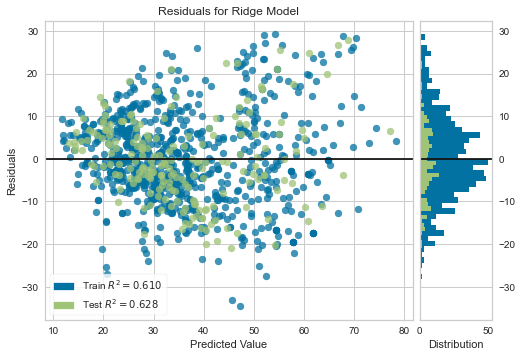

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [101]:
# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
final_model = Ridge()
visualizer = ResidualsPlot(final_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### E2. Output of Analysis and Model's Residual Error

*See output and code above.*

### E3. Code used to support implementation of the Multiple Regression Models

*Please see code above.*

## Part V: Data Summary and Implications

### F1. Results of Data Analysis

#### Regression Equation for the Reduced Model

y=84.04 +20(InternetService_Fiber Optic) -13(InternetService_None) +2.2(Churn_Yes) + 32(Multiple_Yes) + 2.7(OnlineSecurity_Yes) + 22(OnlineBackup_Yes) + 12(DeviceProtection_Yes) + 12(TechSupport_Yes) + 42(StreamingTV_Yes) + 52(StreamingMovies_Yes)

#### Interpretation of Coefficients of the Statistically Significant Variables

Based on the new reduced multiple regression model, the coefficients suggest, that with every 1 unit of: <br>
<br>
InternetService_Fiber Optic, MonthlyCharge will increase 20 units,<br>
InternetService_None, Monthly Charge will decrease by 13 units,<br>
Churn_Yes, MonthlyCharge will increase 2.2 units,<br>
Multiple_Yes, MonthlyCharge will increase 32 units,<br>
OnlineSecurity_Yes, MonthlyCharge will increase 2.7 units,<br>
OnlineBackup_Yes, MonthlyCharge will increase 22 units,<br>
DeviceProtection_Yes, MonthlyCharge will increase 12 units,<br>
TechSupport_Yes, MonthlyCharge will increase 12 units,<br>
StreamingTV_Yes, MonthlyCharge will increase 42 units,<br>
StreamingMovies_Yes, MonthlyCharge will increase 52 units.<br>


#### Statistical and Practical Significance of the Model

The variables with the largest impact on MonthlyCharge were: StreamingMovies_Yes, StreamingTV_Yes, and Multiple_Yes. This is logically sound, as the customers who are subscribing and utilizing multiple features will have a larger monthly bill. Also, the MonthlyCharge was projected to decrease by 13 units with every 1 unit increase of InternetService_None. This makes sense as well, as the subscribers that do not have internet service would have a lower monthly bill.

#### Limitations of Data Analysis

The provided dataset is not very large. If the dataset were larger, or more customer variables were provided the generated model could possibly be more accurate. 

### F2. Recommended Course of Action

The stakeholders, in wanting to increase the Monthly Charge per subscriber, could focus on first encouraging subscribers to subscribe or utilize the streaming service for TV and movies, and also signing up for multiple services.  Fiber Optic Internet Service and Online Backup generated large increases in Monthly charge as well, with 20 units and 22 unit increases, respectively. Device Protection and Tech Support subscriptions incresed the monthly charge by 12 units each.  The stakeholders could focus on all of these features in an attempt to increase the Monthly Charge per subscriber, but should focus most on the streaming services and encouraging subscribers to sign up for multiple services.

### Code Sources

Reed, A. (2019, November 23). *Multivariate Regression Analysis.* GitHub. Retrieved from https://github.com/areed1192/sigma_coding_youtube/blob/a4e8df97856ad224664254fa726ac56cbee4dc57/python/python-data-science/machine-learning/multi-linear-regression/Machine%20Learning%20-%20Multi%20Linear%20Regression%20Analysis.ipynb 

Scikit-yb developers. (2019). Yellowbrick: Residuals Plot. Retrieved from https://www.scikit-yb.org/en/latest/api/regressor/residuals.html#:~:text=The%20residuals%20plot%20shows%20the,to%20more%20or%20less%20error.&amp;text=A%20common%20use%20of%20the,the%20error%20of%20the%20regressor. 

### Additional Sources

Bobbit, Z. (2020, January 8). *The Four Assumptions of Linear Regression.* Statology. Retrieved from https://www.statology.org/linear-regression-assumptions/

Larose, C.D., & Larose, D.T. (2019). *Data science using Python and R.* John Wiley & Sons.

Vallisneri, M. (2018). *Python statistics essential training.* LinkedIn Learning.
https://www.linkedin.com/learning/python-statistics-essential-training/the-structure-of-data?u=2045532

